In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

act_30_path = r"D:\projects\adversarial_robustness\experiments\exp1_cmpe597_regular_mnist_robust30\activations.npy"
act_50_path = r"D:\projects\adversarial_robustness\experiments\exp1_cmpe597_regular_mnist_robust50\activations.npy"
act_70_path = r"D:\projects\adversarial_robustness\experiments\exp1_cmpe597_regular_mnist_robust70\activations.npy"

act1 = np.load(act_30_path)
act2 = np.load(act_50_path)
act3 = np.load(act_70_path)

In [151]:
def get_slice(act):
    slice_size = act.shape[-1] // 5
    #act = act[:, :, :, slice_size*2:slice_size*3, slice_size*2:slice_size*3].mean(axis=-1).mean(axis=-1)
    act = np.vstack([act[0], act[1]])
    act = act.reshape((act.shape[0], -1))
    return act
    #return act[:, :, :, 6, 6]

def plot_5_dims(act):
    slice_size = act.shape[-1] // 3
    #act_slice = act[:, :, :, slice_size:slice_size*2, slice_size:slice_size*2].mean(axis=-1).mean(axis=-1)
    act_slice = act[:, :, :, 8, 5]
    
    fig, ax = plt.subplots(2, 5, figsize=(22, 10))
    ax_i = -1
    for i in range(5):
        for j in range(i+1, 5):
            ax_i += 1
            ax_y, ax_x = ax_i // 5, ax_i % 5
            ax[ax_y, ax_x].scatter(x=act_slice[1, :, i], y=act_slice[0, :, j], c="red")
            ax[ax_y, ax_x].scatter(x=act_slice[0, :, i], y=act_slice[0, :, j], c="blue")
            ax[ax_y, ax_x].set_title(f"Features {i}-{j}")
            ax[ax_y, ax_x].set_xlabel(f"Feature {i}")
            ax[ax_y, ax_x].set_ylabel(f"Feature {j}")
            
    plt.legend(["3", "8"])
    plt.show()

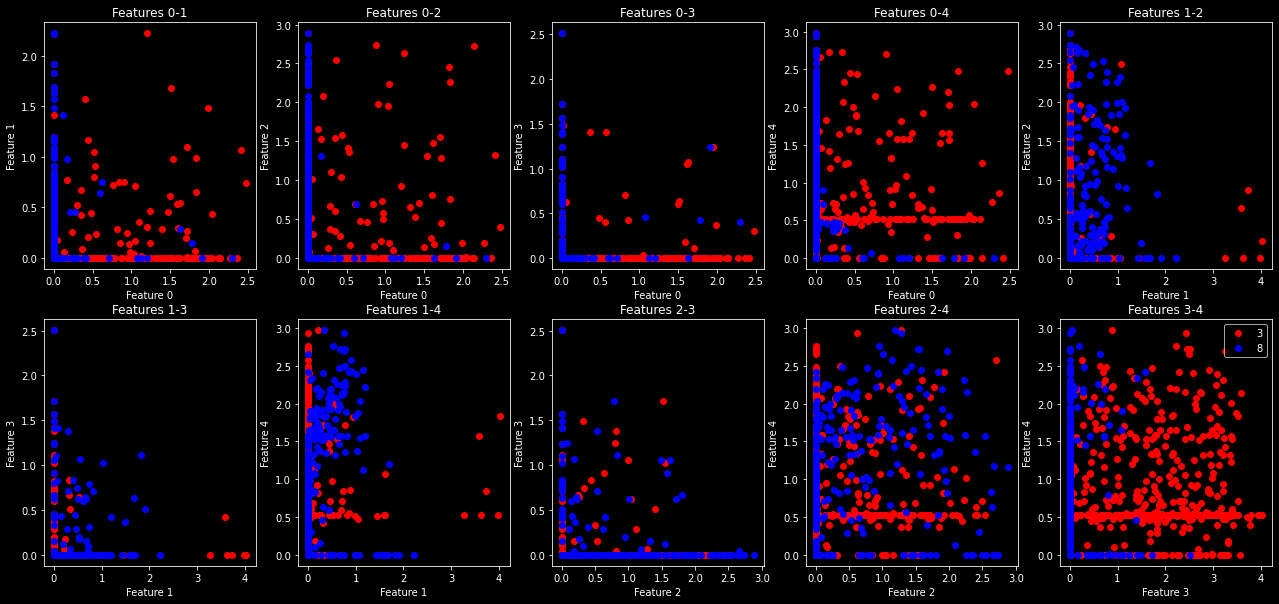

In [152]:
plot_5_dims(act1)

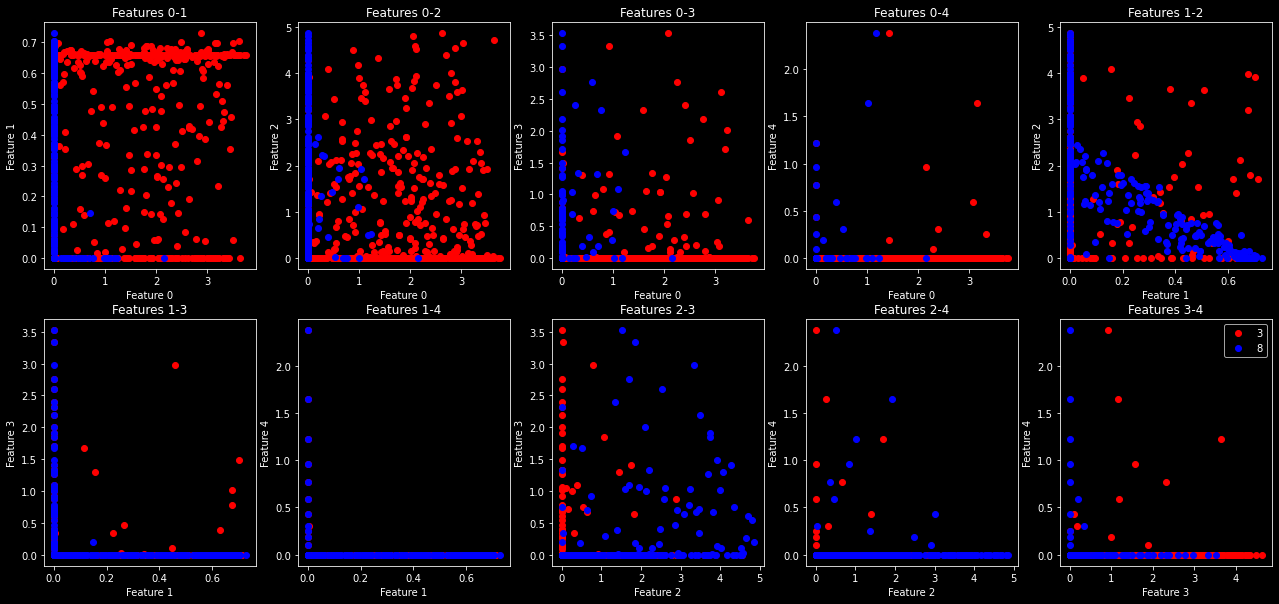

In [153]:
plot_5_dims(act2)

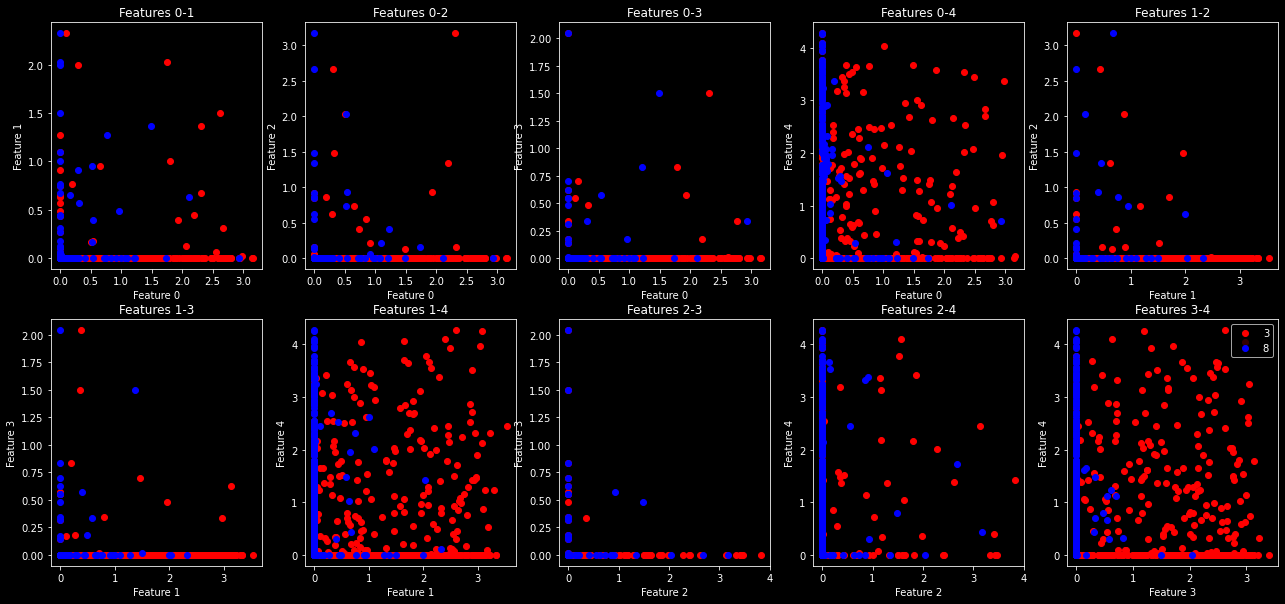

In [154]:
plot_5_dims(act3)

In [126]:
def remove_diag(A):
    return A[~np.eye(A.shape[0],dtype=bool)].reshape(A.shape[0],-1)

def array_cos_similarity(corr1, corr2):
    return np.sum(corr1 * corr2) / (np.sqrt(np.sum(np.square(corr1))) * np.sqrt(np.sum(np.square(corr2))))

def all_features_corr_cos_similarity(act):
    sim_output = np.zeros(act.shape[-2:])
    for i1 in range(act.shape[-2]):
        for i2 in range(act.shape[-1]):
            act_slice = act[:, :, :, i1, i2]
            corr1 = np.corrcoef(act_slice[0].T)
            corr2 = np.corrcoef(act_slice[1].T)
            corr1 = np.nan_to_num(corr1)
            corr2 = np.nan_to_num(corr2)
            np.fill_diagonal(corr1, 0)
            np.fill_diagonal(corr2, 0)
            sim_output[i1, i2] = array_cos_similarity(corr1, corr2)
            
    return sim_output

def plot_feature_corrs(act):
    slice_size = act.shape[-1] // 5
    act_slice = act[:, :, :, slice_size*3:slice_size*4, slice_size*3:slice_size*4].mean(axis=-1).mean(axis=-1)
    corr1 = np.corrcoef(act_slice[0].T)
    corr2 = np.corrcoef(act_slice[1].T)
    np.fill_diagonal(corr1, 0)
    np.fill_diagonal(corr2, 0)
    print(np.max(corr1))
    print(np.max(corr2))
    print(np.mean(corr1 - corr2))
    print(f"cosine similarity: {array_cos_similarity(corr1, corr2)}")

    fig, ax = plt.subplots(1, 4, figsize=(25, 5))
    sns.heatmap(corr1, vmin=-0.5, vmax=0.5, ax=ax[0], cmap="coolwarm")
    sns.heatmap(corr2, vmin=-0.5, vmax=0.5, ax=ax[1], cmap="coolwarm")
    sns.histplot(remove_diag(corr1).flatten(), ax=ax[2])
    sns.histplot(remove_diag(corr2).flatten(), ax=ax[3])
    ax[2].set_xlim([-0.6, 0.6])
    ax[3].set_xlim([-0.6, 0.6])

Activations 1
0.2688531617549382
0.524704312004321
-0.027435817819531094
cosine similarity: 0.7319867292103063
Activations 2
0.38524062521094243
0.14042060230641848
-0.005749436099340013
cosine similarity: 0.8212972964169832
Activations 3
0.7014959425644365
0.2716455516554703
0.11106392292337923
cosine similarity: 0.7583929146105698


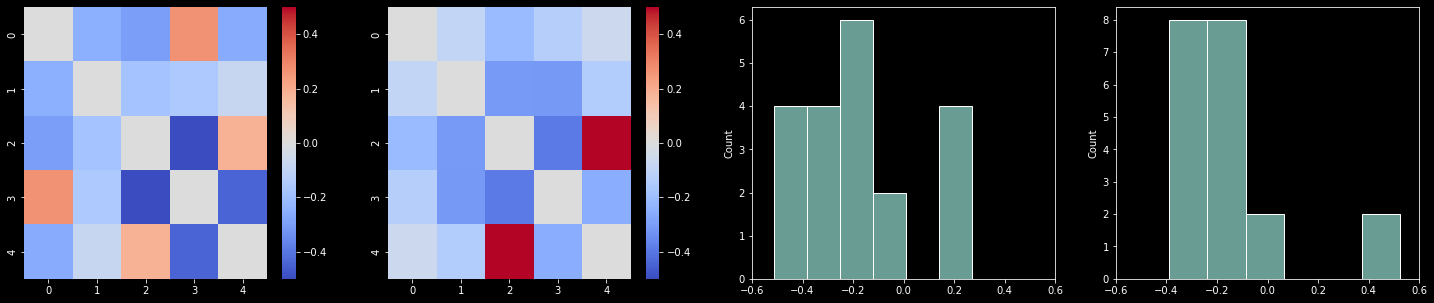

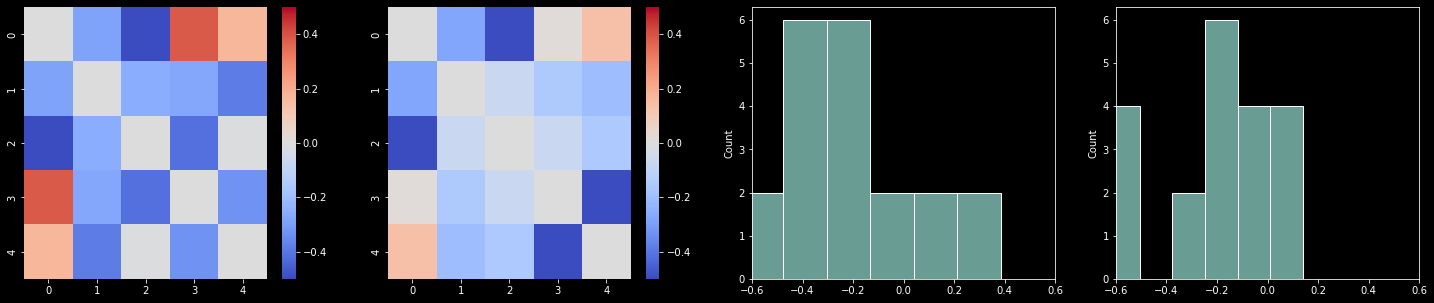

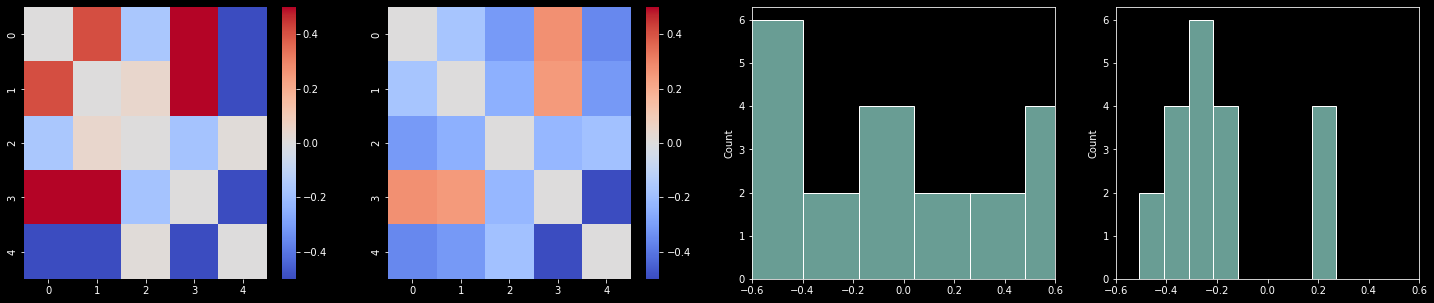

In [127]:
print("Activations 1")
plot_feature_corrs(act1)
print("Activations 2")
plot_feature_corrs(act2)
print("Activations 3")
plot_feature_corrs(act3)

d:\Miniconda3\envs\env\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\ozanz\AppData\Local\Temp/ipykernel_17736/3332575282.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(corr1 * corr2) / (np.sqrt(np.sum(np.square(corr1))) * np.sqrt(np.sum(np.square(corr2))))
d:\Miniconda3\envs\env\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


116.87769443487349

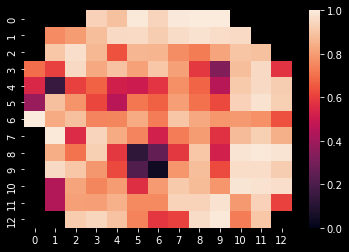

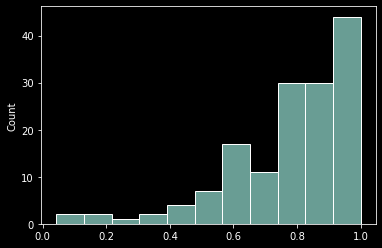

In [136]:
act = act1
corrs1 = all_features_corr_cos_similarity(act)
sns.heatmap(corrs1, vmin=0.0, vmax=1.0)
plt.figure()
sns.histplot(np.abs(corrs1).flatten())
np.nansum(corrs1)

d:\Miniconda3\envs\env\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\ozanz\AppData\Local\Temp/ipykernel_17736/3332575282.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(corr1 * corr2) / (np.sqrt(np.sum(np.square(corr1))) * np.sqrt(np.sum(np.square(corr2))))
d:\Miniconda3\envs\env\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


120.68419265871896

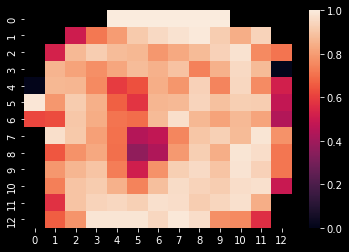

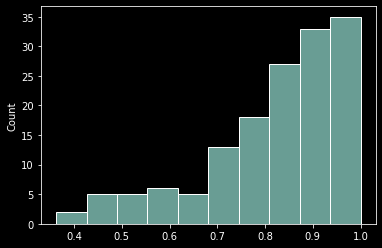

In [137]:
act = act2
corrs1 = all_features_corr_cos_similarity(act)
sns.heatmap(corrs1, vmin=0.0, vmax=1.0)
plt.figure()
sns.histplot(np.abs(corrs1).flatten())
np.nansum(corrs1)

d:\Miniconda3\envs\env\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\ozanz\AppData\Local\Temp/ipykernel_17736/3332575282.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(corr1 * corr2) / (np.sqrt(np.sum(np.square(corr1))) * np.sqrt(np.sum(np.square(corr2))))
d:\Miniconda3\envs\env\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


85.74058276424661

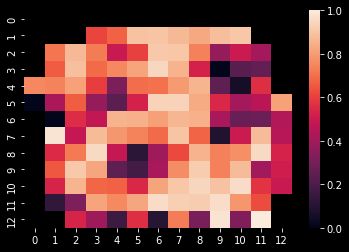

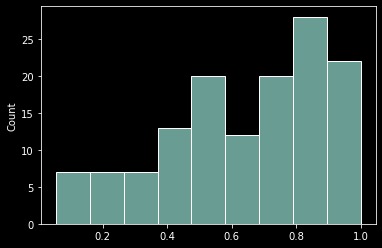

In [138]:
act = act3
corrs1 = all_features_corr_cos_similarity(act)
sns.heatmap(corrs1, vmin=0.0, vmax=1.0)
plt.figure()
sns.histplot(np.abs(corrs1).flatten())
np.nansum(corrs1)